## All you need is love… And a pet!

<img src="img/dataset-cover.jpg" width="920">

Here we are going to build a classifier to predict whether an animal from an animal shelter will be adopted or not (aac_intakes_outcomes.csv, available at: https://www.kaggle.com/aaronschlegel/austin-animal-center-shelter-intakes-and-outcomes/version/1#aac_intakes_outcomes.csv). You will be working with the following features:

1. *animal_type:* Type of animal. May be one of 'cat', 'dog', 'bird', etc.
2. *intake_year:* Year of intake
3. *intake_condition:* The intake condition of the animal. Can be one of 'normal', 'injured', 'sick', etc.
4. *intake_number:* The intake number denoting the number of occurrences the animal has been brought into the shelter. Values higher than 1 indicate the animal has been taken into the shelter on more than one occasion.
5. *intake_type:* The type of intake, for example, 'stray', 'owner surrender', etc.
6. *sex_upon_intake:* The gender of the animal and if it has been spayed or neutered at the time of intake
7. *age_upon\_intake_(years):* The age of the animal upon intake represented in years
8. *time_in_shelter_days:* Numeric value denoting the number of days the animal remained at the shelter from intake to outcome.
9. *sex_upon_outcome:* The gender of the animal and if it has been spayed or neutered at time of outcome
10. *age_upon\_outcome_(years):* The age of the animal upon outcome represented in years
11. *outcome_type:* The outcome type. Can be one of ‘adopted’, ‘transferred’, etc.

In [1]:
import warnings 
warnings.simplefilter(action="ignore", category=FutureWarning)
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
from itertools import combinations 
import ast
from sklearn.linear_model import LogisticRegression
import seaborn as sn
%matplotlib inline

data_folder = './data/'

### A) Load the dataset and convert categorical features to a suitable numerical representation (use dummy-variable encoding). 

- Split the data into a training set (80%) and a test set (20%). Pair each feature vector with the corresponding label, i.e., whether the outcome_type is adoption or not. 
- Standardize the values of each feature in the data to have mean 0 and variance 1.

The use of external libraries is not permitted in part A, except for numpy and pandas. 
You can drop entries with missing values.

---

In [2]:
columns = ['animal_type', 'intake_year', 'intake_condition', 'intake_number', 'intake_type', 'sex_upon_intake', \
          'age_upon_intake_(years)', 'time_in_shelter_days', 'sex_upon_outcome', 'age_upon_outcome_(years)', \
          'outcome_type']
original_data = pd.read_csv(data_folder+'aac_intakes_outcomes.csv', usecols=columns)

original_data.sample(10)

,outcome_type,sex_upon_outcome,age_upon_outcome_(years),animal_type,intake_condition,intake_type,sex_upon_intake,age_upon_intake_(years),intake_year,intake_number,time_in_shelter_days
7492,Adoption,Spayed Female,1.000000,Dog,Normal,Stray,Intact Female,1.000000,2013,1.0,73.818750
55631,Adoption,Neutered Male,0.164384,Cat,Normal,Stray,Intact Male,0.082192,2016,1.0,10.257639
66926,Adoption,Neutered Male,0.164384,Cat,Normal,Owner Surrender,Intact Male,0.082192,2017,1.0,3.177083
67987,Adoption,Neutered Male,4.000000,Cat,Normal,Owner Surrender,Intact Male,4.000000,2017,4.0,14.485417
45322,Return to Owner,Neutered Male,3.000000,Dog,Normal,Owner Surrender,Neutered Male,3.000000,2017,1.0,9.162500
36211,Adoption,Neutered Male,5.000000,Cat,Normal,Owner Surrender,Neutered Male,5.000000,2015,1.0,35.775000
42854,Return to Owner,Neutered Male,12.000000,Dog,Injured,Stray,Neutered Male,12.000000,2015,1.0,2.991667
31370,Euthanasia,Unknown,1.000000,Other,Normal,Wildlife,Unknown,1.000000,2015,1.0,0.029167
11270,Return to Owner,Spayed Female,10.000000,Dog,Normal,Stray,Spayed Female,10.000000,2016,1.0,0.020139
40141,Transfer,Unknown,0.057534,Cat,Normal,Stray,Unknown,0.057534,2015,1.0,0.124306


In [3]:
# Drop NAs
original_data = original_data.dropna()

# Split into feature matrix and target vector
X = original_data.iloc[:, 1:].values
y = (original_data.outcome_type == "Adoption").astype(int)

In [4]:
# Train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

In [5]:
# Preprocess
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Define list of categorical and numeric columns
cat_indices = [0, 2, 3, 4, 5]
num_indices = [1, 6, 7, 8, 9]

# Define preprocessing pipelines for both features
num_pipe = Pipeline([("scaler", StandardScaler())])
cat_pipe = Pipeline([("encode", OneHotEncoder())])

preprocess = ColumnTransformer([
    ("categorical_pipeline", cat_pipe, cat_indices),
    ("numerical_pipeline", num_pipe, num_indices)
])

X_train = preprocess.fit_transform(X_train)
X_test = preprocess.transform(X_test)

### B) Train a logistic regression classifier on your training set. Logistic regression returns probabilities as predictions, so in order to arrive at a binary prediction, you need to put a threshold on the predicted probabilities. 
- For the decision threshold of 0.5, present the performance of your classifier on the test set by displaying the confusion matrix. Based on the confusion matrix, manually calculate accuracy, precision, recall, and F1-score with respect to the positive and the negative class. 

Accuracy 0.82
Class 0: Precision 0.86, Recall 0.82, F1 0.84
Class 1: Precision 0.77, Recall 0.82, F1 0.79
              precision    recall  f1-score   support

           0       0.86      0.82      0.84      9173
           1       0.77      0.82      0.79      6760

    accuracy                           0.82     15933
   macro avg       0.82      0.82      0.82     15933
weighted avg       0.82      0.82      0.82     15933



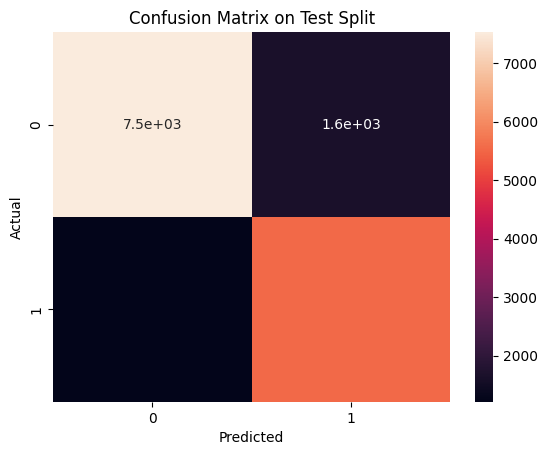

In [6]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)
preds = clf.predict(X_test)

conf_matrix = confusion_matrix(y_test, preds)
_, ax = plt.subplots()
sns.heatmap(conf_matrix, annot=True, ax=ax);
ax.set(
    title="Confusion Matrix on Test Split",
    xlabel="Predicted",
    ylabel="Actual",
);

accuracy = (y_test == preds).mean()
tn, fp = conf_matrix[0]
fn, tp = conf_matrix[1]
precision1 = tp / (tp + fp)
precision0 = tn / (tn + fn)
recall1= tp / (tp + fn)
recall0= tn / (tn + fp)
f11 = 2 * precision1 * recall1 / (precision1 + recall1)
f10 = 2 * precision0 * recall0 / (precision0 + recall0)

print(f"Accuracy {accuracy:.2f}")
print(f"Class 0: Precision {precision0:.2f}, Recall {recall0:.2f}, F1 {f10:.2f}")
print(f"Class 1: Precision {precision1:.2f}, Recall {recall1:.2f}, F1 {f11:.2f}")

report = classification_report(y_test, preds)
print(report)

### C) Vary the value of the threshold in the range from 0 to 1 and visualize the value of accuracy, precision, recall, and F1-score (with respect to both classes) as a function of the threshold.

/Users/jonas-mika/.pyenv/versions/3.9.16/envs/cs401/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


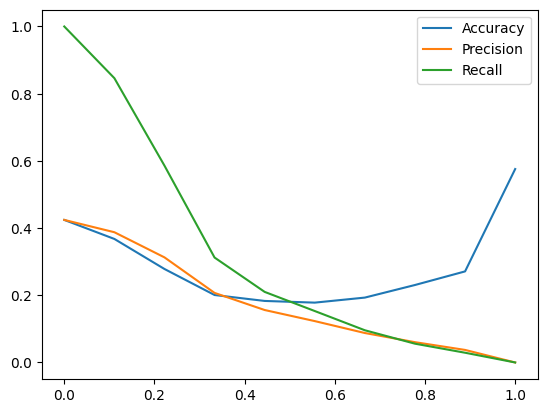

In [7]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
thresholds = np.linspace(0, 1, 10)

accuracies, precisions, recalls = [], [], []
for threshold in thresholds:
    clf = LogisticRegression(max_iter=1000)
    clf.fit(X_train, y_train)
    probs = clf.predict_proba(X_test)
    preds = (probs[:, 0] > threshold).astype(int)

    accuracies.append(accuracy_score(y_test, preds))
    precisions.append(precision_score(y_test, preds))
    recalls.append(recall_score(y_test, preds))

_, ax = plt.subplots()
sns.lineplot(x=thresholds, y=accuracies, label="Accuracy", ax=ax);
sns.lineplot(x=thresholds, y=precisions, label="Precision", ax=ax);
sns.lineplot(x=thresholds, y=recalls, label="Recall", ax=ax);

### D) Plot in a bar chart the coefficients of the logistic regression sorted by their contribution to the prediction.

In [8]:
# Train fresh logistic regression
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

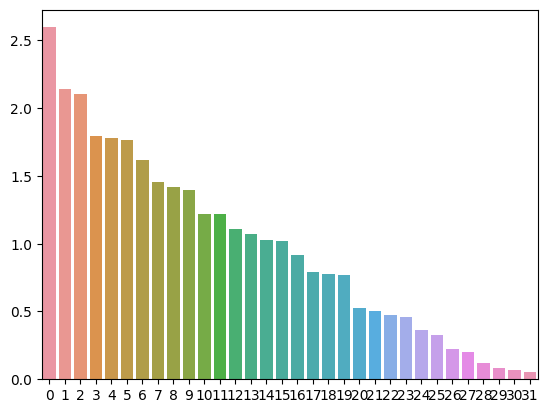

In [9]:
fig, ax = plt.subplots()
coef = sorted(np.abs(clf.coef_).flatten().tolist(), reverse=True)
sns.barplot(x=list(range(len(coef))), y=coef, ax=ax);


## Question 1: Which of the following metrics is most suitable when you are dealing with unbalanced classes?

- a) F1 Score
- b) Recall
- c) Precision
- d) Accuracy

**A) F1 Score**

## Question 2: You are working on a binary classification problem. You trained a model on a training dataset and got the following confusion matrix on the test dataset. What is true about the evaluation metrics (rounded to the second decimal point):

|            | Pred = NO|Pred=YES|
|------------|----------|--------|
| Actual NO  |    50    |   10   |
| Actual YES |    5     |   100  |

- a) Accuracy is 0.95
- b) Accuracy is 0.85
- c) False positive rate is 0.95
- d) True positive rate is 0.95

**D) The true positive rate is 0.95**